You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:

1. Pregnancies: Number of times pregnant (integer)

2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)

3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)

4. SkinThickness: Triceps skin fold thickness (mm) (integer)

5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)

6. BMI: Body mass index (weight in kg/(height in m)^2) (float)

7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float)

8. Age: Age in years (integer)

9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Here’s the dataset link: https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.

Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [209]:
data = pd.read_csv("diabetes.csv")

In [210]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [211]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


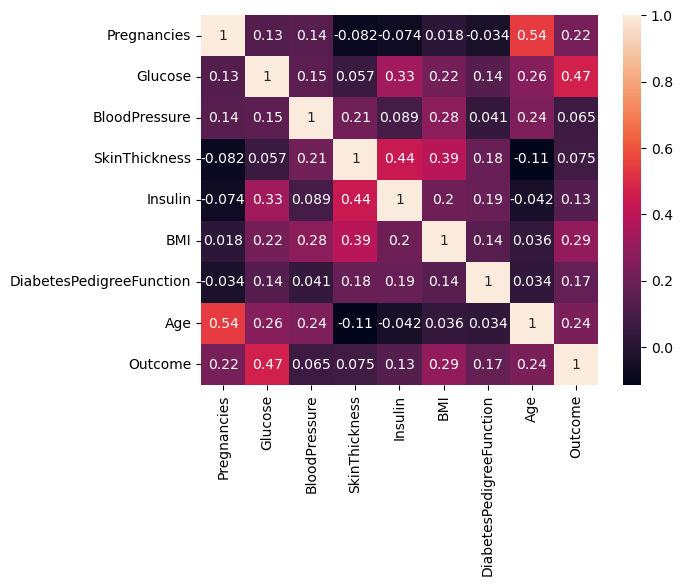

In [212]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [213]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

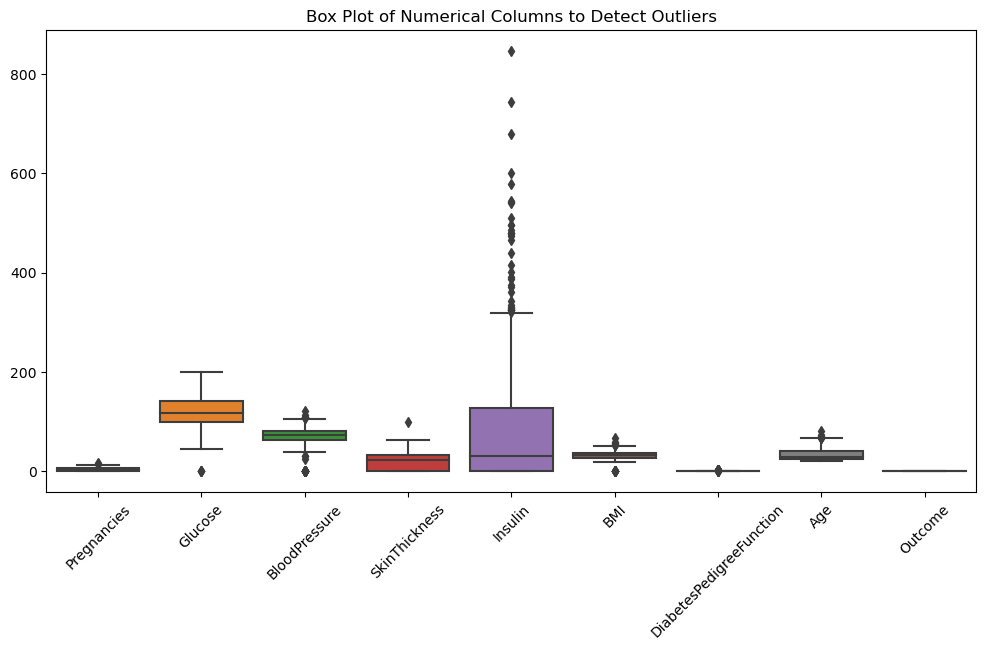

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_data = data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.xticks(rotation=45) 
plt.title("Box Plot of Numerical Columns to Detect Outliers")
plt.show()

In [215]:
columns_to_check = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Calculate the IQR for each column
Q1 = data[columns_to_check].quantile(0.25)
Q3 = data[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold to identify outliers
outlier_threshold = 0.6

filtered_data = data[~((data[columns_to_check] < (Q1 - outlier_threshold * IQR)) | (data[columns_to_check] > (Q3 + outlier_threshold * IQR))).any(axis=1)]

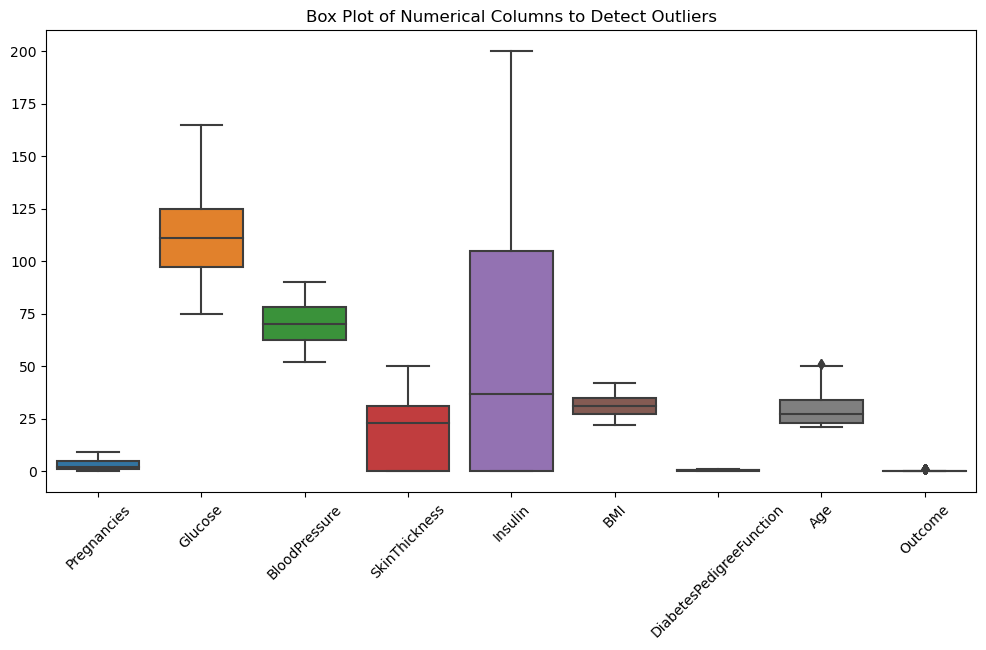

In [216]:
#cleaned_data = cleaned_data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data)
plt.xticks(rotation=45) 
plt.title("Box Plot of Numerical Columns to Detect Outliers")
plt.show()

In [217]:
filtered_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [218]:
from sklearn.model_selection import train_test_split

X = filtered_data.drop('Outcome', axis=1)
y = filtered_data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [219]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)
clf.fit(X_train, y_train)

cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [220]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

y_probs = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

Accuracy: 0.7746478873239436
Precision: 0.5
Recall: 0.4375
F1 Score: 0.4666666666666667
Confusion Matrix:
 [[48  7]
 [ 9  7]]
ROC AUC: 0.6431818181818182


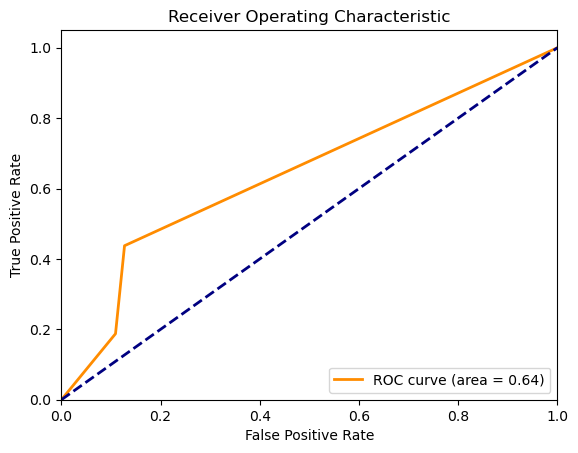

In [221]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion)
print("ROC AUC:", roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [222]:
tree_structure = clf.tree_

In [223]:
feature_importances = clf.tree_.compute_feature_importances(normalize=False)
feature_importances

array([0.02996278, 0.06515092, 0.05195641, 0.05145239, 0.01545086,
       0.06606174, 0.03128604, 0.03961721])

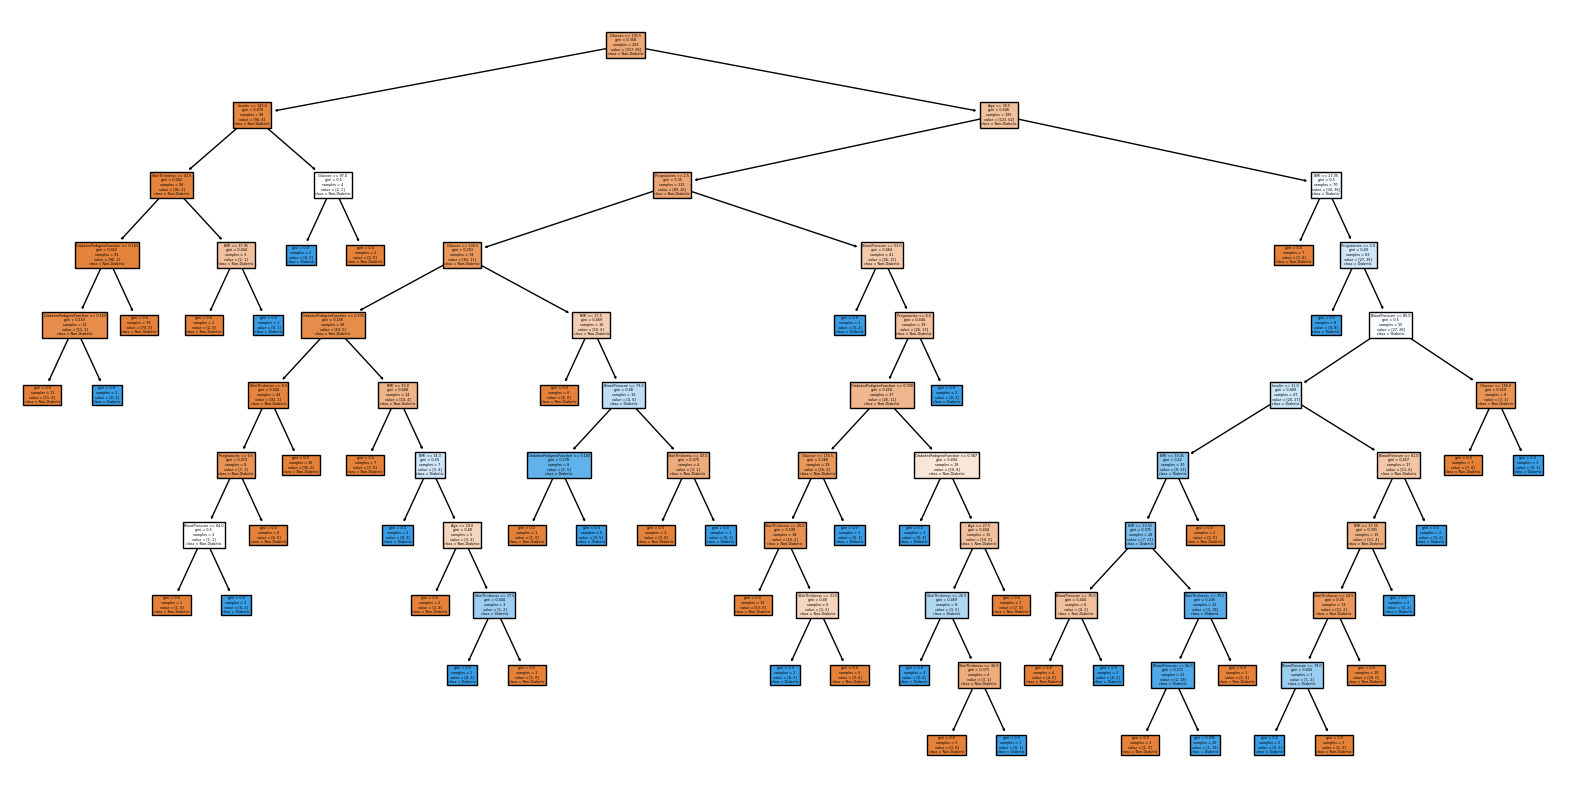

In [224]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Non-Diabetic', 'Diabetic'])
plt.show()

In [225]:
node = tree_structure.children_left[0]  
num_samples = tree_structure.n_node_samples[node]
class_distribution = tree_structure.value[node]
threshold = tree_structure.threshold[node]

print(num_samples)
print(class_distribution)
print(threshold)

98
[[94.  4.]]
143.0


In [226]:
tree_depth = tree_structure.max_depth
tree_depth

10

In [227]:
from sklearn.tree import export_text

tree_rules = export_text(clf, feature_names=list(X.columns))

print("Decision Tree Rules:")
print(tree_rules)

Decision Tree Rules:
|--- Glucose <= 101.50
|   |--- Insulin <= 143.00
|   |   |--- SkinThickness <= 41.50
|   |   |   |--- DiabetesPedigreeFunction <= 0.16
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.16
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DiabetesPedigreeFunction >  0.16
|   |   |   |   |   |--- class: 1
|   |   |   |--- DiabetesPedigreeFunction >  0.16
|   |   |   |   |--- class: 0
|   |   |--- SkinThickness >  41.50
|   |   |   |--- BMI <= 37.95
|   |   |   |   |--- class: 0
|   |   |   |--- BMI >  37.95
|   |   |   |   |--- class: 1
|   |--- Insulin >  143.00
|   |   |--- Glucose <= 97.00
|   |   |   |--- class: 1
|   |   |--- Glucose >  97.00
|   |   |   |--- class: 0
|--- Glucose >  101.50
|   |--- Age <= 30.50
|   |   |--- Pregnancies <= 2.50
|   |   |   |--- Glucose <= 130.50
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.54
|   |   |   |   |   |--- SkinThickness <= 6.50
|   |   |   |   |   |   |--- Pregnancies <= 0.50
|   |   |   |   |   |   |   |

#### Interpretation of the above decision tree:

The decision tree rules you've provided represent the structure of the decision tree model you've trained on your diabetes dataset. Each branch in the tree represents a decision point based on a feature (variable) and a threshold, and each leaf node represents a class prediction (0 for non-diabetic, 1 for diabetic).

Let's interpret the decision tree step by step:

1. **Root Node (Glucose <= 101.50):** The first split is based on the glucose level. If the glucose level is less than or equal to 101.50, we move to the left subtree; otherwise, we move to the right subtree.

2. **Left Subtree (Glucose <= 101.50):** This subtree deals with cases where glucose is low. It further splits based on insulin, skin thickness, and diabetes pedigree function.

   - If insulin is less than or equal to 143.00, we check skin thickness.
   - If skin thickness is less than or equal to 41.50 and diabetes pedigree function is less than or equal to 0.16, the predicted class is 0 (non-diabetic).
   - If skin thickness is less than or equal to 41.50 and diabetes pedigree function is greater than 0.16, the predicted class is 1 (diabetic).
   - If skin thickness is greater than 41.50 and BMI is less than or equal to 37.95, the predicted class is 0.
   - If skin thickness is greater than 41.50 and BMI is greater than 37.95, the predicted class is 1.

3. **Right Subtree (Glucose > 101.50):** This subtree deals with cases where glucose is high. It further splits based on age and pregnancies.

   - If age is less than or equal to 30.50 and pregnancies are less than or equal to 2.50, we check glucose and diabetes pedigree function.
   - If glucose is less than or equal to 130.50 and diabetes pedigree function is less than or equal to 0.54, we check skin thickness and blood pressure.
   - The tree continues to make decisions based on various features, ultimately leading to class predictions.

4. **Leaf Nodes:** The leaf nodes represent the final class predictions. For example, in the left subtree, you have leaf nodes with class labels 0 and 1, indicating non-diabetic and diabetic predictions, respectively.

For example, if a patient's glucose level is 110, insulin is 150, skin thickness is 35, diabetes pedigree function is 0.2, age is 28, and pregnancies are 3, we would start at the root node and follow the decision path according to the values of these features to arrive at a class prediction.

This interpretation provides insights into the decision-making process of the decision tree. Features such as "Glucose," "Insulin," "SkinThickness," "BMI," "Age," "Pregnancies," and "DiabetesPedigreeFunction" play significant roles in determining the predictions. The tree uses various thresholds to separate the data into different classes, ultimately predicting whether a patient is diabetic (class 1) or non-diabetic (class 0) based on these conditions.

In [228]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, precision_score, recall_score

# cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(clf, X, y, cv=cv, scoring='f1')

print("Cross-Validation F1 Scores:", cross_val_scores)
print("Mean F1 Score:", np.mean(cross_val_scores))

Cross-Validation F1 Scores: [0.46666667 0.36363636 0.36363636 0.48648649 0.38709677]
Mean F1 Score: 0.4135045309238857


In [231]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# sensitivity analysis by varying the decision threshold
def sensitivity_analysis(model, X_test, y_test, thresholds):
    results = []
    for threshold in thresholds:
        y_pred_prob = model.predict_proba(X_test)[:, 1]  
        y_pred = (y_pred_prob >= threshold).astype(int)  
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_prob)
        results.append({
            'Threshold': threshold,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC AUC': roc_auc
        })
    return pd.DataFrame(results)

# range of thresholds to test
thresholds_to_test = np.arange(0.1, 1.0, 0.1)

sensitivity_results = sensitivity_analysis(clf, X_test, y_test, thresholds_to_test)
print(sensitivity_results)

   Threshold  Accuracy  Precision  Recall  F1 Score   ROC AUC
0        0.1  0.774648        0.5  0.4375  0.466667  0.643182
1        0.2  0.774648        0.5  0.4375  0.466667  0.643182
2        0.3  0.774648        0.5  0.4375  0.466667  0.643182
3        0.4  0.774648        0.5  0.4375  0.466667  0.643182
4        0.5  0.774648        0.5  0.4375  0.466667  0.643182
5        0.6  0.774648        0.5  0.4375  0.466667  0.643182
6        0.7  0.774648        0.5  0.4375  0.466667  0.643182
7        0.8  0.774648        0.5  0.4375  0.466667  0.643182
8        0.9  0.774648        0.5  0.4375  0.466667  0.643182
